# WALMART DATA ANALYSIS

Predict weekly sales according to features for Walmarts across country.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [2]:
df = pd.read_csv('DATA/Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

#### Convert date to only year. #####

In [5]:
dates = df['Date'].str.split('-')
years = dates.str[2]
years = years.apply(int)

df.drop('Date', axis=1, inplace=True)
df = df.join(years)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012


In [6]:
df['Date'].unique()

array([2010, 2011, 2012])

#### Check correlations ####

<AxesSubplot: >

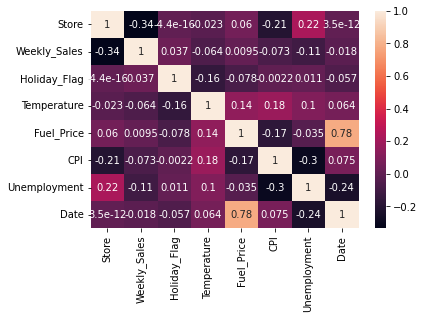

In [7]:
sns.heatmap(data=df.corr(), annot=True)

In [8]:
df.corr()['Weekly_Sales'].sort_values()

Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Date           -0.018378
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

#### Correlation between 'Weekly_Sales' and 'Fuel_Price' below 1%. Drop 'Fuel_Price' column. ####

In [9]:
df.drop('Fuel_Price', axis=1, inplace=True)

#### Final Dataset ####

In [10]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,Date
0,1,1643690.90,0,42.31,211.096358,8.106,2010
1,1,1641957.44,1,38.51,211.242170,8.106,2010
2,1,1611968.17,0,39.93,211.289143,8.106,2010
3,1,1409727.59,0,46.63,211.319643,8.106,2010
4,1,1554806.68,0,46.50,211.350143,8.106,2010
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,192.013558,8.684,2012
6431,45,733455.07,0,64.89,192.170412,8.667,2012
6432,45,734464.36,0,54.47,192.327265,8.667,2012
6433,45,718125.53,0,56.47,192.330854,8.667,2012


## PREPARING THE DATA FOR TRAINING

In [11]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

## MODEL TRAINING

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### PERFORMANCE EVALUATION FOR VALIDATION

In [18]:
y_valid_pred = model.predict(X_valid)
from sklearn.metrics import r2_score
r2_score(y_valid, y_valid_pred)

0.9327728559314781

### FINAL PERFORMANCE

In [19]:
y_test_predict = model.predict(X_test)
r2_score(y_test, y_test_predict)

0.9284136068024514